# Table of Contents

[Questionnaire only](#Questionnaire-only)
  - [Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?](#Can-the-answers-to-the-scientific-questions-be-used-to-predict-if-the-questionnaire-was-filled-before-or-after-the-game?)
    - [If scientific questions are coded by answers](#If-scientific-questions-are-coded-by-answers)
    - [If scientific questions are coded by correctedness](#If-scientific-questions-are-coded-by-correctedness)
[RedMetrics only](#RedMetrics-only)
  - [Can the score of a player be predicted with their RedMetrics data?](#Can-the-score-of-a-player-be-predicted-with-their-RedMetrics-data?)

[Questionnaire and RedMetrics](#Questionnaire-and-RedMetrics)
  - [Can the biology level of a player be predicted using the game data?](#Can-the-biology-level-of-a-player-be-predicted-using-the-game-data?)
  - [Can the gaming profile of a player be predicted using the game data?](#Can-the-gaming-profile-of-a-player-be-predicted-using-the-game-data?)
  - [Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly?](#Can-the-completion-time-of-each-chapter-be-used-to-predict-if-a-player-is-going-to-answer-a-specific-scientific-question-correctly?)
  - [Can the game data be used to predict the performance on a sub-group of scientific questions?](#Can-the-game-data-be-used-to-predict-the-performance-on-a-sub-group-of-scientific-questions?)
    - [Using an arbitrary classification of questions](#Using-an-arbitrary-classification-of-questions)
      - [Hard questions](#Hard-questions)
      - [Biobrick symbol recognition](#Biobrick-symbol-recognition)
      - [Easy questions](#Easy-questions)
    - [Using Bloom's taxonomy](#Using-Bloom's-taxonomy)
      - [knowledge questions](#knowledge-questions)
      - [comprehension questions](#comprehension-questions)
      - [application questions](#application-questions)
      - [analysis questions](#analysis-questions)
      - [synthesis questions](#synthesis-questions)
  - [Can the completion time be predicted from questionnaire answers?](#Can-the-completion-time-be-predicted-from-questionnaire-answers?)
    - [From the before questionnaire](#From-the-before-questionnaire)
    - [From the after questionnaire](#From-the-after-questionnaire)

In [1]:
%run dataFormating.ipynb

rmdfTestUsers read_csv success (1/3)
rmdf1522 read_csv success (2/3)
rmdf160 read_csv success (3/3)
gform read_csv success
gformFR read_csv success
temporalities set (user answer method)


IntProgress(value=0, max=2074)

IntProgress(value=0, max=1037)

profile info set


IntProgress(value=0, max=5)

IntProgress(value=0, max=4)

IntProgress(value=0, max=160)

IntProgress(value=0, max=125)

IntProgress(value=0, max=35)

FloatProgress(value=0.0, max=125.0)

dataFormating.ipynb:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  "rmdf160 read_csv success (3/3)\n",
dataFormating.ipynb:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "rmdf160 read_csv success (3/3)\n",


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [5]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8876984126984127

In [6]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9300264550264551

In [7]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9066137566137566

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [8]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [9]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.9278939217963608

In [10]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9400890437475803

In [11]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9319589624467673

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [12]:
allDataClassif.columns

Index(['sessionsCount', 'scorepretest', 'scoreposttest', 'scoreundefined',
       'complete', 'configure', 'craft', 'death', 'equip', 'unequip',
       ...
       'delta Device: GFP:RBS:PCONS:TER XXX',
       'delta Device: PCONS:GFP:RBS:TER XXX',
       'delta Device: AMPR:RBS:PCONS:TER XXX',
       'delta Device: RBS:PCONS:AMPR:TER XXX', 'delta Green fluorescence',
       'delta Unequip the movement device: effect',
       'delta Device: PBAD:RBS:ARA:TER', 'delta Language', 'delta Temporality',
       'anonymousID'],
      dtype='object', length=185)

## Can the score of a player be predicted with their RedMetrics data?

In [13]:
def getAnonymousData(allDataClassif):
    return allDataClassif.drop("anonymousID", axis = 1)

In [14]:
# columns to exclude: contain direct information on posttest score
dropPosttestColumns = allDataClassif.columns & (deltaQuestions + posttestQuestions + ["scoreposttest"])

In [15]:
def getUnscaledFeatures(anonymousData):
    # Only select rows where scoreafter is not negative
    return anonymousData[anonymousData["scoreposttest"] >= 0].drop(dropPosttestColumns, axis = 1)

In [16]:
def getFeaturesTarget(allDataClassif):
    # Remove id
    anonymousData = getAnonymousData(allDataClassif)

    # Get features and target
    # Only select rows where scoreafter is not negative
    unscaledFeatures = getUnscaledFeatures(anonymousData)
    target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

    # Center and scale data
    #features = preprocessing.scale(unscaledFeatures)

    # Center and scale data variant
    standardScaler = preprocessing.StandardScaler()
    standardScaler.fit(unscaledFeatures)
    features = standardScaler.transform(unscaledFeatures)
    
    # Run Lasso regression with cross-validation
    model = Lasso()
    scores = cross_val_score(model, features, target, cv=10)
    boxplot(scores)
    
    model.fit(features, target)
    
    return standardScaler, model, features, target, unscaledFeatures

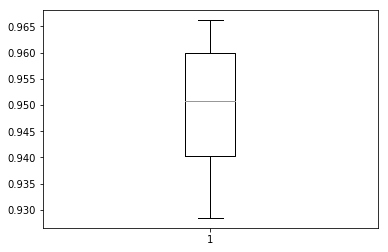

In [58]:
standardScaler, model, features, target, unscaledFeatures = getFeaturesTarget(allDataClassif)

### Prediction of a single score

In [18]:
def getPrediction(standardScaler, model, unscaledX):
    X = standardScaler.transform([unscaledX])
    return model.predict(X)[0]

In [19]:
def getPredictionVsActual(standardScaler, model, allDataClassif):
    unscaledFeatures = getUnscaledFeatures(getAnonymousData(allDataClassif))
    
    result = pd.DataFrame(index = unscaledFeatures.index, columns=["predicted", "actual", "error"], data = -1)

    for userId in unscaledFeatures.index:
        unscaledX = unscaledFeatures.loc[userId].values
        actualScore = allDataClassif.loc[userId, "scoreposttest"]

        result.loc[userId, "predicted"] = getPrediction(standardScaler, model, unscaledX)
        result.loc[userId, "actual"] = actualScore
        result.loc[userId, "error"] = result.loc[userId, "predicted"] - result.loc[userId, "actual"]
        
    return result

#### use allData from online campaigns

In [20]:
len(gfdfWebgl1522PretestPosttestUniqueProfilesVolunteers),\
len(gfdfWebgl160PretestPosttestUniqueProfilesVolunteers)

(4, 2)

In [21]:
def getPosttestUserIds(gfdf):
    return gfdf[gfdf[QTemporality] == answerTemporalities[1]][QUserId].unique()

In [22]:
allDataWebgl1522 = prepareAllData(getAllUserVectorData(
    getPosttestUserIds(gfdfWebgl1522UniqueProfiles),
    rmdfWebgl1522UniqueProfiles,
    gfdfWebgl1522UniqueProfiles,
    _source = correctAnswers + demographicAnswers))

FloatProgress(value=0.0, max=15.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [23]:
allDataWebgl160 = prepareAllData(getAllUserVectorData(
    getPosttestUserIds(gfdfWebgl160UniqueProfiles),
    rmdfWebgl160UniqueProfiles,
    gfdfWebgl160UniqueProfiles,
    _source = correctAnswers + demographicAnswers))

FloatProgress(value=0.0, max=29.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [24]:
allDataClassifWebgl1522 = getAllDataClassif(allDataWebgl1522)
allDataClassifWebgl160  = getAllDataClassif(allDataWebgl160)

In [59]:
getPredictionVsActual(standardScaler, model, allDataClassifWebgl1522)

,predicted,actual,error
b9be0024-b77d-4b7b-b26a-f2e3d82ecafe,0.678709,15.0,-14.321291
c4d5c2ab-a86a-4878-9b9c-3bc29628a261,0.678709,12.0,-11.321291
4e5e410c-22d4-44c7-82cc-6a25cff97da0,12.208540,18.0,-5.791460
8e8acb8f-c28c-4822-8209-781995b5067e,19.253703,22.0,-2.746297
ee70d80e-995d-437b-9808-c6a34cfad9be,0.678709,13.0,-12.321291
3bce59e8-bf13-4a95-a6af-b6c959aa369e,0.678709,0.0,0.678709
066d77c2-f8ef-439f-95ef-70b5a6a25cc7,0.678709,0.0,0.678709
abbf78ac-d9aa-4fb0-aa0b-f5f40a57838e,8.722084,8.0,0.722084
c6751bee-a692-4488-8b6f-51143bff7255,0.678709,5.0,-4.321291
c0c9be87-f78b-4acf-ac90-7e514a8ed58f,0.678709,9.0,-8.321291


In [25]:
getPredictionVsActual(standardScaler, model, allDataClassifWebgl160)

,predicted,actual,error
a54888f5-4f01-4ada-bdb4-acb690ffea29,0.678709,0.0,0.678709
8bd09edc-d41b-49db-b28d-70936ede92f4,0.678709,9.0,-8.321291
68638e14-d6e9-427e-b6a5-d08d70de11b4,0.678709,8.0,-7.321291
cf660ca8-c15b-4981-bfec-3fc17763ca3d,0.678709,9.0,-8.321291
4485769d-b558-45ee-988b-044941e25c96,0.678709,0.0,0.678709
3c2c28c6-0749-4411-bc32-decb36961122,0.678709,4.0,-3.321291
b6945f6a-c2f0-415c-8f85-39e7665dda55,2.772737,1.0,1.772737
5f4dc96b-bddc-4ac6-993f-1540efcbecee,0.678709,0.0,0.678709
59a78fec-045b-4baa-b10e-65acf9edbcba,0.678709,6.0,-5.321291
02b0d824-e66e-4800-8eae-b37696d743f2,0.678709,9.0,-8.321291


### Prediction of all scores

In [26]:
if False:
    sortedUnscaledFeatures = anonymousData[anonymousData["scoreposttest"] >= 0].sort_values(by="scoreposttest").drop(dropPosttestColumns, axis = 1)
    sortedTarget = sorted(anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"])

    # Center and scale data variant
    sortedFeatures = standardScaler.transform(sortedUnscaledFeatures)

    x = range(len(sortedFeatures))
    alpha = 0.5

    fig, ax = plt.subplots()
    plt.title('Actual vs predicted score')
    plt.xlabel('User index')
    plt.ylabel('Score')
    #plt.plot(x, model.predict(sortedFeatures), kind = 'bar')
    #plt.plot(x, sortedTarget)
    ax.bar(x, model.predict(sortedFeatures), alpha=alpha, label='predicted', linewidth=0)
    ax.bar(x, sortedTarget,                  alpha=alpha, label='actual')
    ax.legend()
    fig.tight_layout()
    plt.show()

Conclusion: Score can be predicted by the table of RedMetrics data (18/07/2018).

In [27]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([0.95528189, 0.95925509, 0.8792537 , 0.95363984, 0.93561055,
       0.91621772, 0.9677488 , 0.93096553, 0.93826607, 0.94253719])

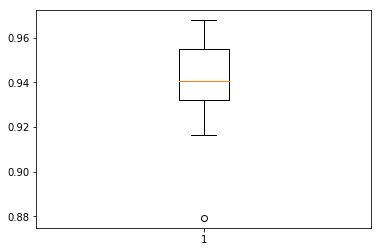

In [28]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [29]:
stemTimesCriteria = ["ch" + "{0:0=2d}".format(i) for i in range(0,15)]
completionTimesCriteria = [st + "completion" for st in stemTimesCriteria] + ["completionTime"]
totalTimesCriteria = [st + "total" for st in stemTimesCriteria] + ["totalTime"]

In [30]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]

features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + totalTimesCriteria + completionTimesCriteria]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.36592486,  0.430899  ,  0.05166824, -0.24491618,  0.35003405,
        0.40765292,  0.38250941,  0.29846249, -0.17289975,  0.64738162])

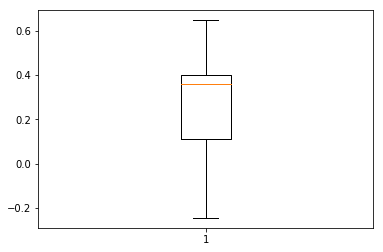

In [31]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [32]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-0.20066654, -0.20680147, -0.03503828, -0.94148878, -0.78800588,
       -0.06369471, -0.00391573, -0.05202545, -0.51785574, -0.00128933])

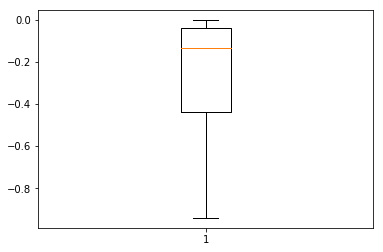

In [33]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [34]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-0.00236054, -0.08076277, -0.00236054, -0.25334272, -0.06184537,
       -0.00062652, -0.08508329, -0.1057248 , -0.24054161, -0.1057248 ])

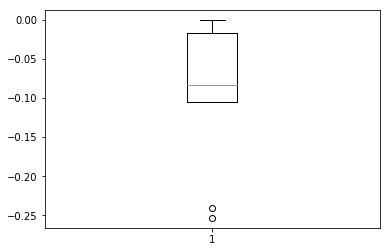

In [35]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly?

In [36]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreposttest"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreposttest"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: Use

C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

,QGenotypePhenotype,QBioBricksDevicesComposition,QAmpicillin,QBBNamePlasmid,QBBFunctionTER,QBBNamePromoter,QBBFunctionGameCDS,QBBNameTerminator,QBBFunctionBiologyCDS,QBBNameRBS,...,QDevicePconsRbsFlhdcTer,QDevicePbadRbsGfpTer,QDevicePbadGfpTbsTer,QDeviceGfpRbsPconsTer,QDevicePconsGfpRbsTer,QDeviceAmprRbsPconsTer,QDeviceRbsPconsAmprTer,QGreenFluorescence,QUnequipDevice,QDevicePbadRbsAraTer
Mean,0.760000,0.720590,0.616000,0.640179,0.705769,0.654256,0.816,0.567436,0.761282,0.864231,...,0.632077,0.776000,0.672103,0.734692,0.752000,0.776179,0.760000,0.613872,0.623179,0.856846
Var,0.035247,0.053049,0.054259,0.039117,0.114707,0.063619,0.048,0.106841,0.077792,0.017477,...,0.051608,0.019596,0.027386,0.040862,0.053066,0.030263,0.043818,0.084378,0.073772,0.043850


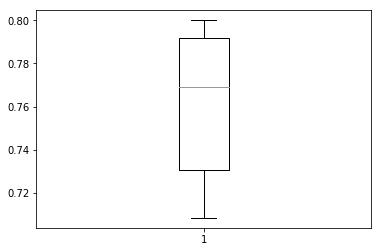

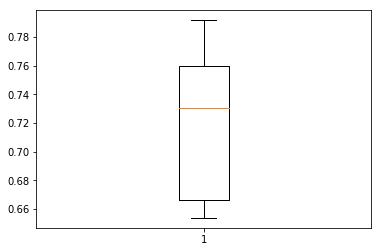

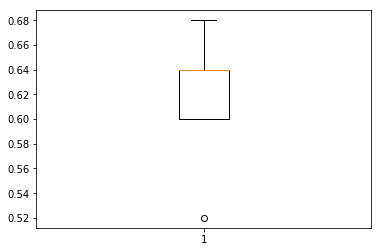

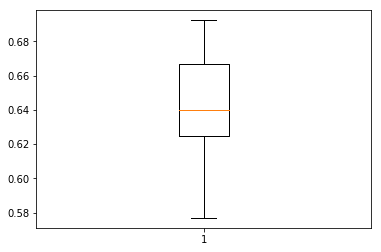

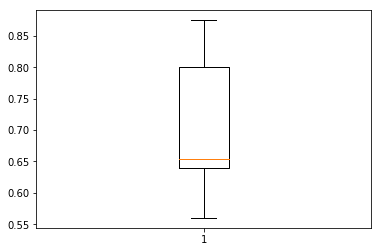

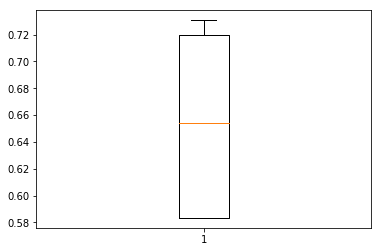

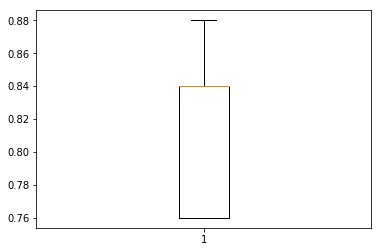

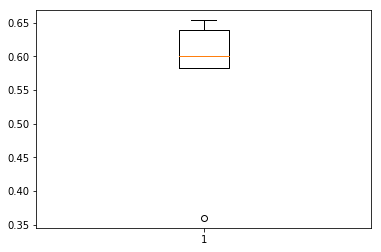

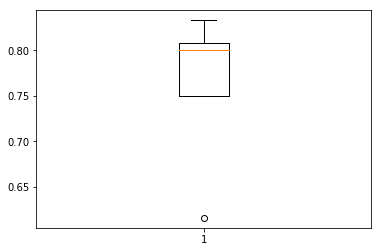

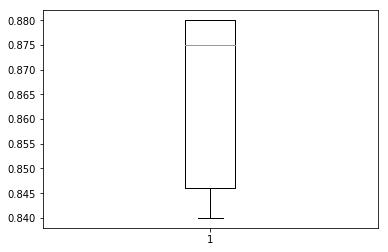

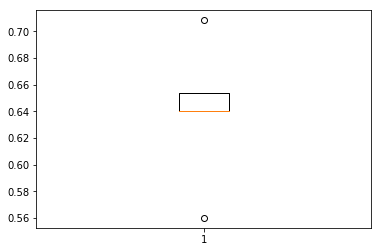

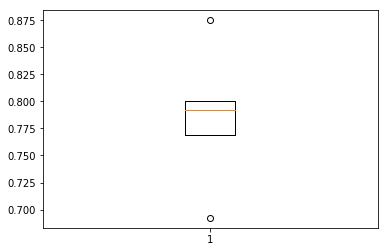

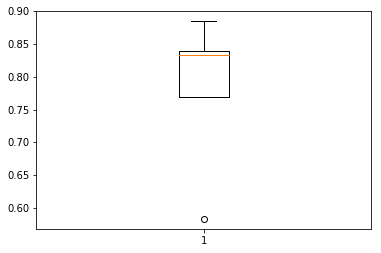

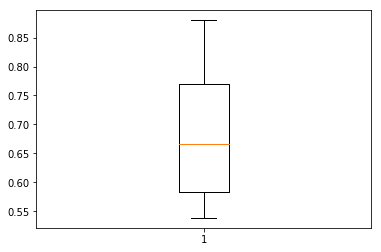

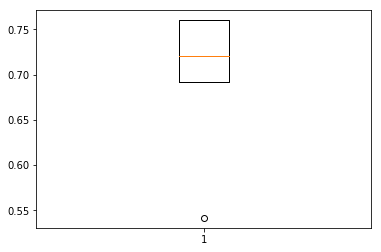

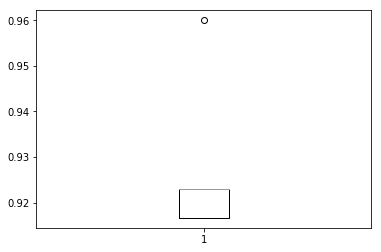

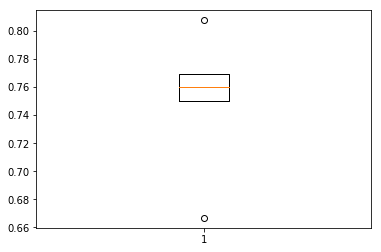

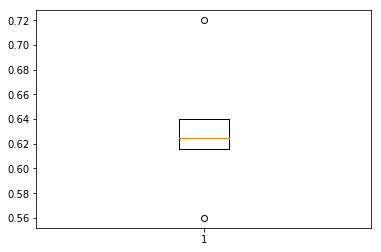

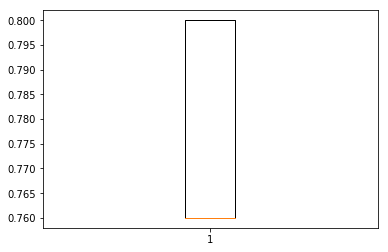

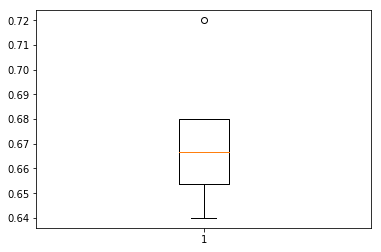

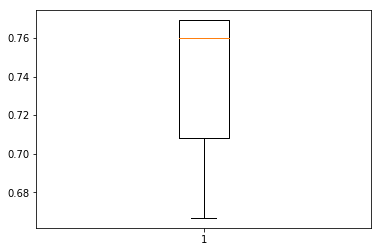

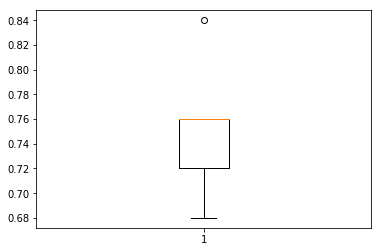

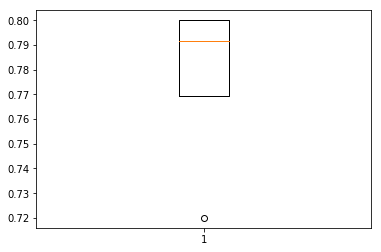

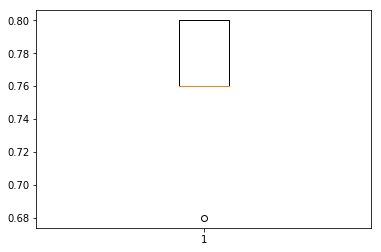

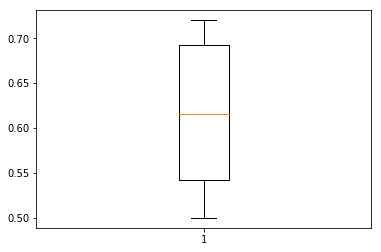

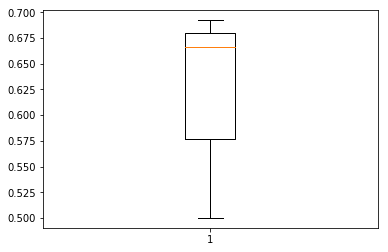

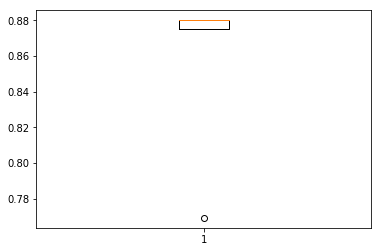

In [37]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for question in ["QGenotypePhenotype", "QBioBricksDevicesComposition", "QAmpicillin", "QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator", "QDeviceRbsPconsFlhdcTer", "QDevicePconsRbsFlhdcTer", "QDevicePbadRbsGfpTer", "QDevicePbadGfpTbsTer", "QDeviceGfpRbsPconsTer", "QDevicePconsGfpRbsTer", "QDeviceAmprRbsPconsTer", "QDeviceRbsPconsAmprTer", "QGreenFluorescence", "QUnequipDevice", "QDevicePbadRbsAraTer"]:
    questionTag = question
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (29/05/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

In [38]:
def getBoxplot(scores, title = ''):
    # figure related code
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(scores)
    ax.set_title(title)

In [39]:
#pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1).columns

In [40]:
# boxplot function
#  questions: array of strings of question names
def getPerformanceFromQuestionGroup(questions,
                                    thresholdPercentage = 1.0,
                                    extraTreesClassifier = False,
                                    randomForestClassifier = False,
                                    lasso = False,
                                    histTarget = 0
                                   ):
    # Remove id
    anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

    # Get features and target
    features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
    
    digitalTarget = anonymousData.loc[:, questions].astype(int).sum(axis=1)
    categoricalTarget = digitalTarget.apply(lambda x: 0 if x < thresholdPercentage*len(questions) else 1)

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)

    if extraTreesClassifier:
        # Classify using extra tree classifiers, more random than random forest methods
        clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget, cv=10)
        print("ExtraTreesClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "ExtraTreesClassifier boxplot")
        
    if randomForestClassifier:
        # Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget)
        print("RandomForestClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "RandomForestClassifier boxplot")
        
    if lasso:
        # Run Lasso regression with cross-validation
        model = Lasso()
        scores = cross_val_score(model, features, digitalTarget, cv=10)
        print("Lasso scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "Lasso boxplot")
        
    if histTarget > 0:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist(target, bins = range(histTarget))

### Using an arbitrary classification of questions

#### Hard questions

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: -0.2844626488532766


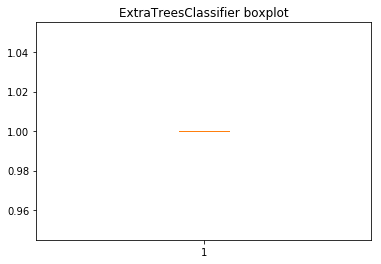

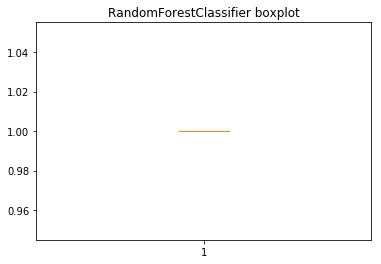

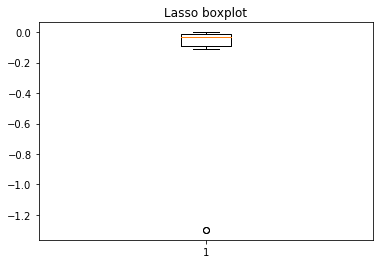

In [41]:
hardQuestions = ["QBBFunctionPR", "QBBNameOperator", "QDevicePbadRbsAraTer"]
getPerformanceFromQuestionGroup(hardQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: Very high quality prediction (29/05/18)

### Biobrick symbol recognition

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: 0.5999866100964696


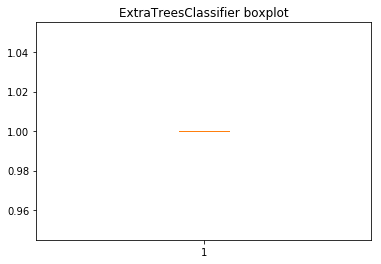

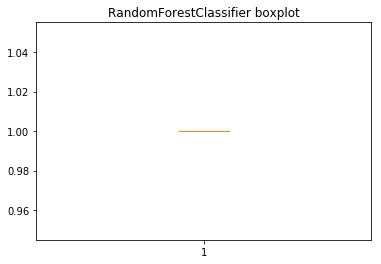

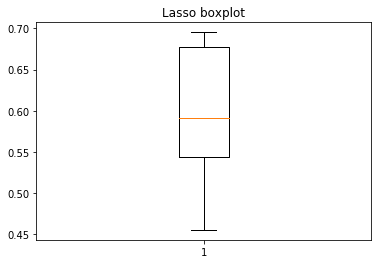

In [42]:
bbSymbolRecognition = ["QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator"]
getPerformanceFromQuestionGroup(bbSymbolRecognition, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions

ExtraTreesClassifier scores mean: 0.8144688644688646
RandomForestClassifier scores mean: 0.784165698799845
Lasso scores mean: -0.1767643397310685


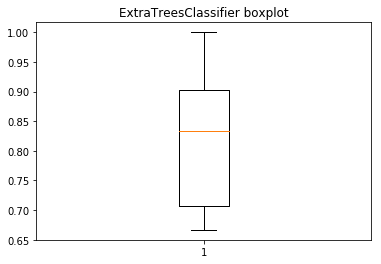

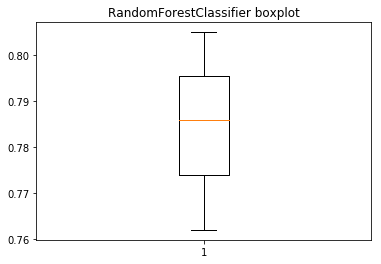

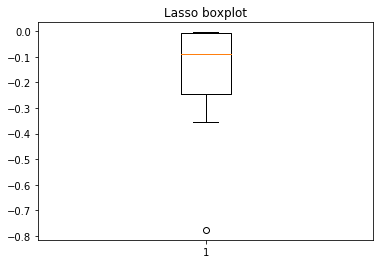

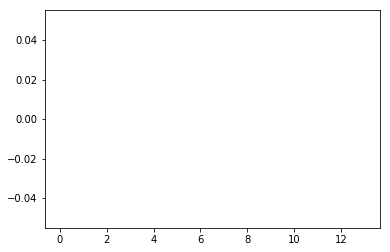

In [43]:
easyQuestions = ["QBioBricksDevicesComposition", "QDeviceRbsPconsFlhdcTer", "QGreenFluorescence"]
getPerformanceFromQuestionGroup(easyQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

Conclusion: Inconclusive (01/02/2018)

### Using Bloom's taxonomy

Not interpreted yet.

#### knowledge questions

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: 0.02277935741820235


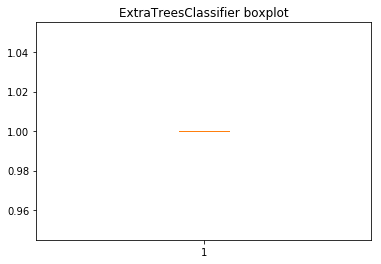

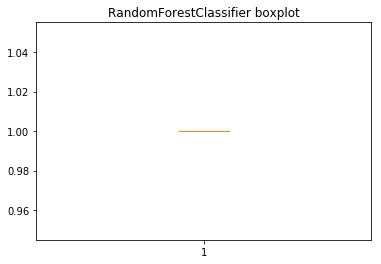

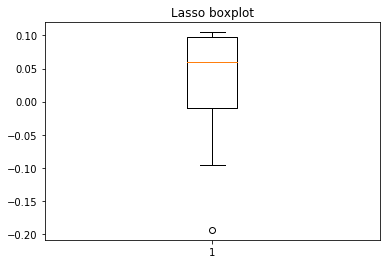

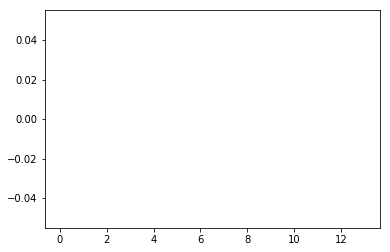

In [44]:
knowledgeQuestions = ["QAmpicillin",
                      "QBBNamePlasmid",
                      "QBBNamePromoter",                      
                      "QBBNameTerminator",
                      "QBBNameRBS",
                      "QBBNameCDS",
                      "QBBNameOperator",
                     ]
getPerformanceFromQuestionGroup(knowledgeQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### comprehension questions

ExtraTreesClassifier scores mean: 0.8079836829836828
RandomForestClassifier scores mean: 0.8086594819436566
Lasso scores mean: 0.055596309891976926


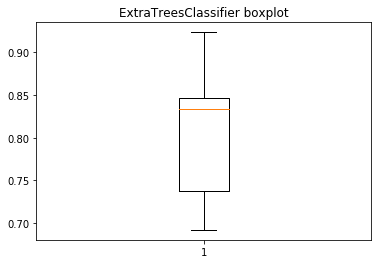

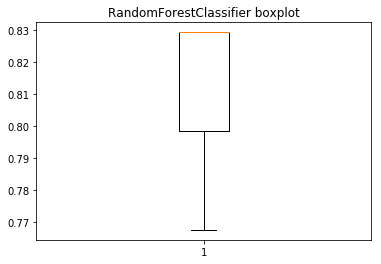

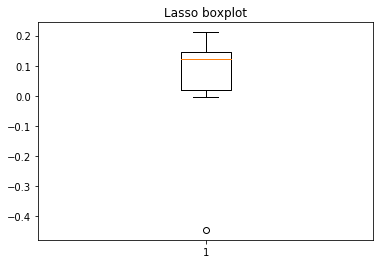

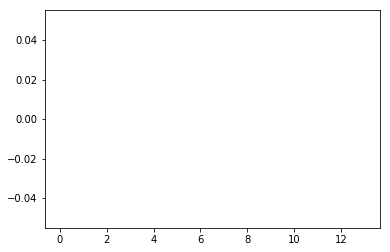

In [45]:
comprehensionQuestions = ["QBioBricksDevicesComposition",
                      "QBBFunctionTER",
                      "QBBFunctionPlasmid",                      
                      "QUnequipDevice",
                     ]
getPerformanceFromQuestionGroup(comprehensionQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### application questions

ExtraTreesClassifier scores mean: 0.8560606060606061
RandomForestClassifier scores mean: 0.8480449090205188
Lasso scores mean: -0.24845001848474046


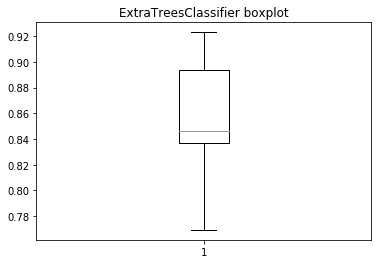

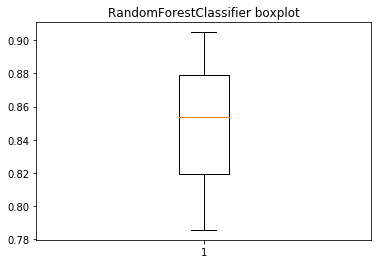

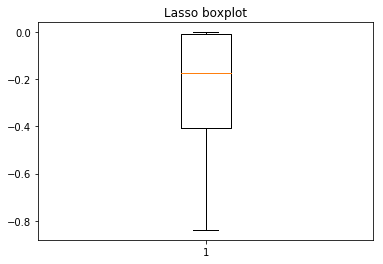

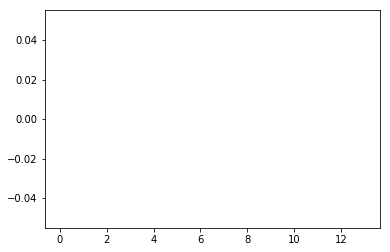

In [46]:
applicationQuestions = ["QGenotypePhenotype",
                      "QBBExampleCDS",
                      "QGreenFluorescence",
                     ]
getPerformanceFromQuestionGroup(applicationQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### analysis questions

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ExtraTreesClassifier scores mean: 0.9928571428571429
RandomForestClassifier scores mean: 0.9922480620155039


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Lasso scores mean: -0.13032702995682896


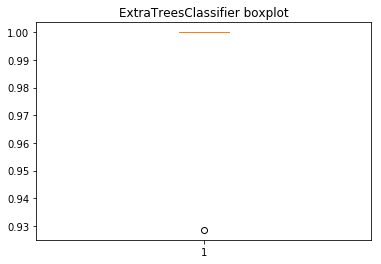

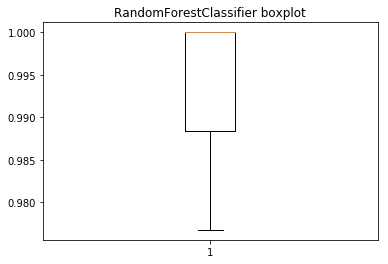

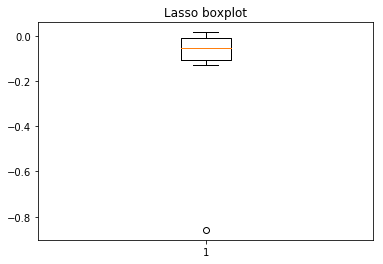

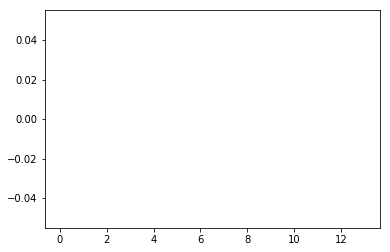

In [47]:
analysisQuestions = ["QBBFunctionGameCDS",
                      "QBBFunctionBiologyCDS",
                      "QBBFunctionPR",
                      "QBBFunctionRBS",
                      "QDevicePbadRbsAraTer",
                     ]
getPerformanceFromQuestionGroup(analysisQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### synthesis questions

ExtraTreesClassifier scores mean: 0.880011655011655
RandomForestClassifier scores mean: 0.8880695783702023
Lasso scores mean: 0.6446933508326204


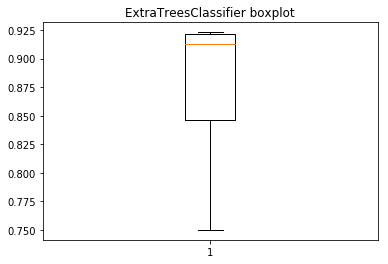

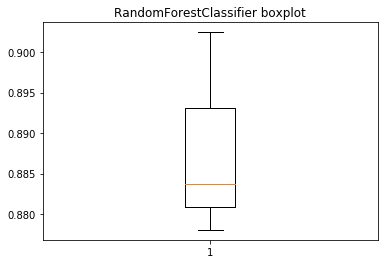

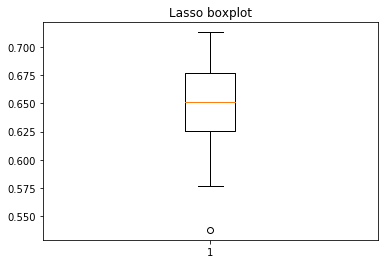

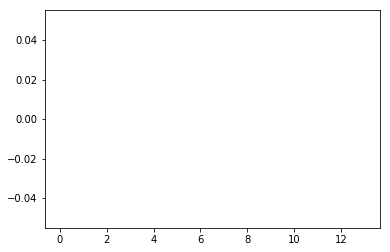

In [48]:
synthesisQuestions = ["QDeviceRbsPconsFlhdcTer",
                      "QDevicePconsRbsFlhdcTer",
                      "QDevicePbadRbsGfpTer",                      
                      "QDevicePbadGfpTbsTer",
                      "QDeviceGfpRbsPconsTer",
                      "QDevicePconsGfpRbsTer",
                      "QDeviceAmprRbsPconsTer",
                      "QDeviceRbsPconsAmprTer",
                     ]
getPerformanceFromQuestionGroup(synthesisQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [49]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.8412622294421277

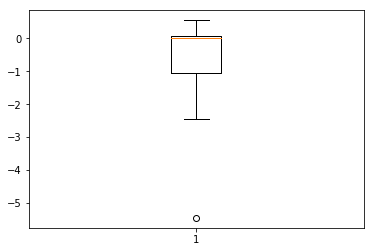

In [50]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.888

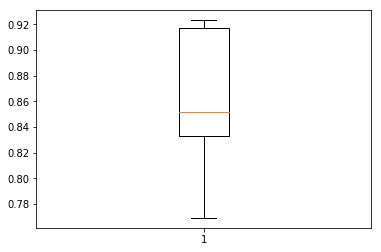

In [51]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [52]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.5793867514042578

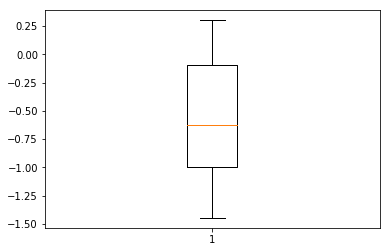

In [53]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.8491758241758243

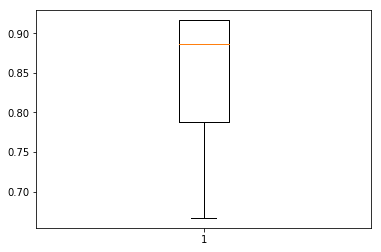

In [54]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: Yes (29/05/18)

In [55]:
sum(target)

111

In [56]:
len(target)

125

Conclusion: Yes but very unbalanced classes (29/05/18)